# Importamos de datos

In [1]:
! pip install geopandas shapely rasterio Pillow imgaug 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from PIL import Image
from rasterio.plot import show
import random
from pyproj import Proj, transform, Transformer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, concatenate, Concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

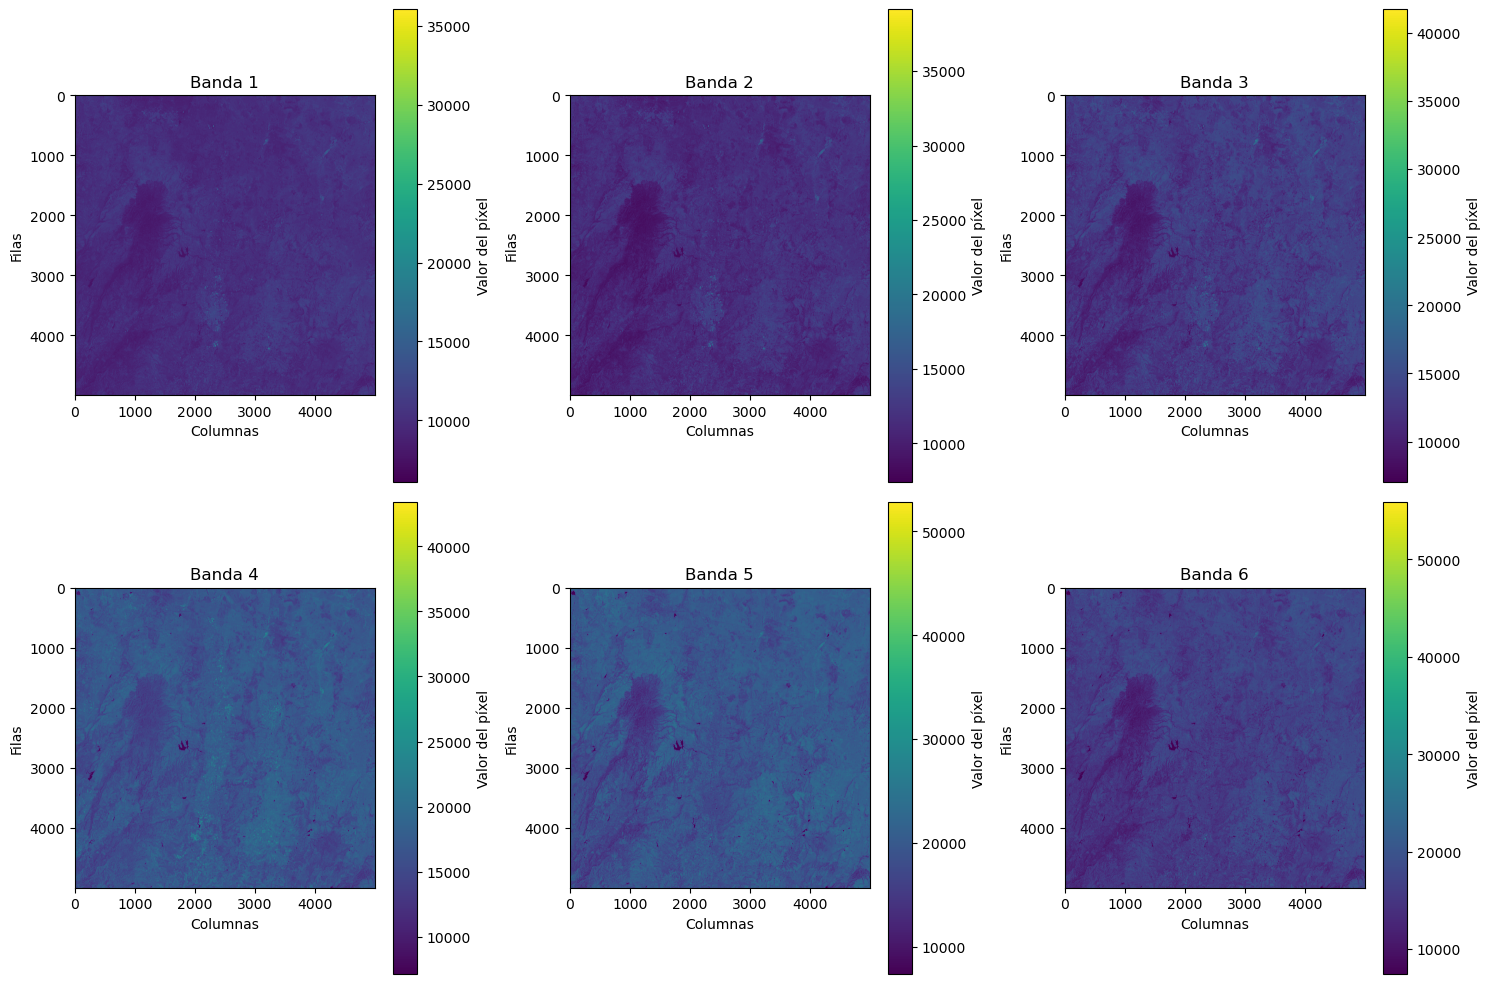

In [3]:
import rasterio
import matplotlib.pyplot as plt

ruta_tiff = "imagen.tif"

with rasterio.open(ruta_tiff) as src:
    srs_raster = src.crs.to_proj4()

# Leer todas las bandas del GeoTIFF
with rasterio.open(ruta_tiff) as src:
    # Obtener el número de bandas en el GeoTIFF
    num_bandas = src.count

    # Crear una matriz de subplots para mostrar todas las bandas
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Iterar a través de las bandas y mostrarlas
    for i in range(1, num_bandas + 1):
        img = src.read(i)

        # Definir la ubicación de la subtrama en la matriz de subplots
        row = (i - 1) // 3
        col = (i - 1) % 3

        # Mostrar la banda en la subtrama correspondiente
        im = axs[row, col].imshow(img, cmap='viridis')
        axs[row, col].set_title(f'Banda {i}')
        axs[row, col].set_xlabel('Columnas')
        axs[row, col].set_ylabel('Filas')

        # Agregar una barra de colores para la subtrama actual
        cbar = fig.colorbar(im, ax=axs[row, col], label='Valor del píxel')

    # Ajustar el espacio entre las subtramas para que no se superpongan
    plt.tight_layout()

    # Mostrar la trama con todas las bandas
    plt.show()


In [4]:
ruta_csv = "denue.csv"
try:
    df = pd.read_csv(ruta_csv, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin1' encoding
    df = pd.read_csv(ruta_csv, encoding='latin1')
df

C:\Users\ANDRES.PEREZ\AppData\Local\Temp\ipykernel_12052\1814713611.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv, encoding='latin1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,6862345,01001115119000031001000000U2,AGROPECUARIA CHARCOS DE QUEZADA,AGROPECUARIA CHARCOS DE QUEZADA SOCIEDAD DE PR...,115119,Otros servicios relacionados con la agricultura,6 a 10 personas,AVENIDA,UNIVERSIDAD,CALLE,...,Aguascalientes,0233,9,4492853716,NaN,NaN,Fijo,21.906992,-102.309807,2019-04
1,6905212,01001115119000041000000000U1,AGROPECUARIO LOS ALAMITOS,NaN,115119,Otros servicios relacionados con la agricultura,0 a 5 personas,CALLE,J. ENCARNACION PAYEN,CALLE,...,Aguascalientes,0322,18,4499960472,NaN,NaN,Fijo,21.889926,-102.314009,2019-11
2,6166248,01007112512000012001000000U8,CENTRO ACUÍCOLA PABELLON DE HIDALGO,SAGARPA,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,SEMARNAT [Centro Acuícola],0078,800,NaN,NaN,WWW.GOB.MX,Fijo,22.167778,-102.345556,2010-07
3,6166233,01010112512000011000000000U9,G. ACUÍCOLA SANTA ROSA,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CARRETERA,SECTOR DE PRODUCCION N0 1 TERREMOTO EL LLANO A...,CARRETERA,...,Santa Rosa [Granja Acuícola],0069,800,NaN,NaN,NaN,Fijo,21.956298,-101.997312,2014-12
4,6166234,01003112512000031001000000U7,GRANJA ACUICOLA ARROYO DE LOS CABALLOS,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,PROLONGACION,CUAUHTUMOC,CARRETERA,...,Arroyo Ojocalientillo,0100,2,4492741517,MARTINSAU2720@HOTMAIL.COM,NaN,Fijo,21.837255,-102.710931,2014-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61641,24371,01001931210000451001000000U1,VISITADURIA DE NOTARIAS,SECRETARÍA DE GOBIERNO DEL ESTADO,931210,Administración pública en general,11 a 30 personas,CALLE,SARH,CALLE,...,Aguascalientes,0816,45,NaN,NaN,NaN,Fijo,21.875367,-102.279581,2014-12
61642,33009,01001931210001573000000000U1,VOCALÍA DEL REGISTRO FEDERAL DE ELECTORES,INSTITUTO NACIONAL ELECTORAL,931210,Administración pública en general,11 a 30 personas,AVENIDA,CONVENCION DE 1914 SUR,CALLE,...,Aguascalientes,0888,17,NaN,FELIPE.REYESRO@INE.ORG,WWW.INE.COM.MX,Fijo,21.865938,-102.289821,2014-12
61643,50694,01010931610000081000000000U8,ZONA ESCOLAR 18 DE TELESECUNDARIA,INSTITUTO DE EDUCACIÓN DE AGUASCALIENTES,931610,Actividades administrativas de instituciones d...,0 a 5 personas,CALLE,GUADALUPE VICTORIA,CALLE,...,Palo Alto,0158,35,4969673226.0,NaN,NaN,Fijo,21.919051,-101.959755,2014-12
61644,40740,01001931410000573000000000U8,ZONA MILITAR,SECRETARÍA DE LA DEFENSA NACIONAL,931410,Impartición de justicia y mantenimiento de la ...,11 a 30 personas,CALLE,RIO LERMA,OTRO (ESPECIFIQUE),...,Aguascalientes,2013,25,NaN,NaN,NaN,Fijo,21.893411,-102.323357,2014-12


In [5]:
# Selecciona las columnas deseadas
df_limpio = df[["codigo_act", "per_ocu", "latitud", "longitud"]].copy()
df_limpio["codigo_act"] = df_limpio["codigo_act"].astype(str).str.slice(0, 2)
df_limpio["codigo_act"] = df_limpio["codigo_act"].astype(float)
# Muestra el nuevo DataFrame
print(df_limpio)

       codigo_act           per_ocu    latitud    longitud
0            11.0   6 a 10 personas  21.906992 -102.309807
1            11.0    0 a 5 personas  21.889926 -102.314009
2            11.0    0 a 5 personas  22.167778 -102.345556
3            11.0   6 a 10 personas  21.956298 -101.997312
4            11.0    0 a 5 personas  21.837255 -102.710931
...           ...               ...        ...         ...
61641        93.0  11 a 30 personas  21.875367 -102.279581
61642        93.0  11 a 30 personas  21.865938 -102.289821
61643        93.0    0 a 5 personas  21.919051 -101.959755
61644        93.0  11 a 30 personas  21.893411 -102.323357
61645        93.0  11 a 30 personas  21.875196 -102.281411

[61646 rows x 4 columns]


In [6]:
# Reemplaza los valores 32 y 33 por 31
df_limpio['codigo_act'].replace({32: 31, 33: 31}, inplace=True)

# Reemplaza el valor 49 por 48
df_limpio['codigo_act'].replace({49: 48}, inplace=True)

# Generamos una copia de la base aumentada

In [7]:
import pandas as pd
import numpy as np

def aumentar_tamano_df(df, factor):
    # Calcular los pesos de acuerdo a la columna "codigo_act"
    codigo_counts = df['codigo_act'].value_counts()
    df['peso'] = df['codigo_act'].map(lambda x: len(df) / codigo_counts[x])
    
    # Calcular la cantidad de repeticiones según el factor
    cantidad_repeticiones = int(len(df) * factor)
    
    if cantidad_repeticiones <= 0:
        return pd.DataFrame()  # Retorna un DataFrame vacío si el factor es <= 0
    
    # Crear un DataFrame complemento con el tamaño complementario
    tamaño_original = len(df)
    tamaño_complementario = tamaño_original + cantidad_repeticiones
    
    # Determinar cuántas veces se debe repetir cada fila en el DataFrame original
    repeticiones_por_fila = (cantidad_repeticiones * df['peso'] / df['peso'].sum()).astype(int)
    
    # Crear un DataFrame con las filas duplicadas según los pesos
    df_duplicado = df.loc[np.repeat(df.index, repeticiones_por_fila)]
    
    # Si hay filas adicionales, seleccionar aleatoriamente para completar
    filas_adicionales = tamaño_complementario - len(df_duplicado)
    complemento_df = df.sample(n=filas_adicionales, replace=True)
    
    # Concatenar el DataFrame original duplicado y el complemento
    resultado_df = pd.concat([df_duplicado, complemento_df], ignore_index=True)
    
    return resultado_df


df_equilibrado = aumentar_tamano_df(df_limpio, factor=100)  # Duplica el tamaño
df_equilibrado = df_equilibrado.sample(frac=0.1, random_state=42)
df_equilibrado

,codigo_act,per_ocu,latitud,longitud,peso
2471688,51.0,11 a 30 personas,21.861965,-102.302657,278.941176
2498133,51.0,0 a 5 personas,21.896003,-102.262543,278.941176
2687212,51.0,0 a 5 personas,21.862926,-102.303631,278.941176
244891,11.0,0 a 5 personas,21.896882,-102.318231,1761.314286
5103599,71.0,11 a 30 personas,22.224665,-102.167724,81.220026
...,...,...,...,...,...
1154542,23.0,0 a 5 personas,21.901388,-102.275836,120.637965
4587403,61.0,0 a 5 personas,21.866301,-102.204862,39.491352
5558048,81.0,0 a 5 personas,21.881569,-102.242119,6.579082
999478,23.0,0 a 5 personas,21.889677,-102.243797,120.637965


In [8]:
df_limpio = df_limpio.drop('per_ocu', axis=1)
df_limpio = df_limpio.drop('peso', axis=1)
df_equilibrado = df_equilibrado.drop('per_ocu', axis=1)
df_equilibrado = df_equilibrado.drop('peso', axis=1)

# Revisar proporciones de cada base

In [9]:
proporcion = (df_limpio["codigo_act"].value_counts() / len(df_limpio))
proporcion

46.0    0.369886
81.0    0.151997
72.0    0.142037
31.0    0.095838
62.0    0.053272
43.0    0.037504
54.0    0.026652
61.0    0.025322
52.0    0.019401
53.0    0.018363
56.0    0.017487
71.0    0.012312
93.0    0.008403
23.0    0.008289
48.0    0.007657
51.0    0.003585
22.0    0.001054
11.0    0.000568
21.0    0.000308
55.0    0.000065
Name: codigo_act, dtype: float64

In [10]:
proporcion = (df_equilibrado["codigo_act"].value_counts() / len(df_equilibrado))
proporcion

46.0    0.053013
72.0    0.050877
31.0    0.050473
62.0    0.050366
81.0    0.050273
54.0    0.050009
71.0    0.049998
93.0    0.049918
21.0    0.049892
43.0    0.049781
22.0    0.049736
52.0    0.049736
61.0    0.049727
53.0    0.049723
51.0    0.049661
55.0    0.049486
56.0    0.049441
11.0    0.049367
48.0    0.049349
23.0    0.049176
Name: codigo_act, dtype: float64

# Analizamos el tipo de dato y valores nulos

In [11]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = df_limpio.isnull().sum()

# Muestra la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

# Muestra el tipo de dato por columna
tipos_de_dato = df_limpio.dtypes

# Muestra el tipo de dato por columna
print("\nTipo de dato por columna:")
print(tipos_de_dato)

Valores nulos por columna:
codigo_act    0
latitud       0
longitud      0
dtype: int64

Tipo de dato por columna:
codigo_act    float64
latitud       float64
longitud      float64
dtype: object


In [12]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = df_equilibrado.isnull().sum()

# Muestra la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

# Muestra el tipo de dato por columna
tipos_de_dato = df_equilibrado.dtypes

# Muestra el tipo de dato por columna
print("\nTipo de dato por columna:")
print(tipos_de_dato)

Valores nulos por columna:
codigo_act    0
latitud       0
longitud      0
dtype: int64

Tipo de dato por columna:
codigo_act    float64
latitud       float64
longitud      float64
dtype: object


# Convertimos a geodataframe

In [13]:
# Crea una columna 'geometry' utilizando las columnas de latitud y longitud
geometry = [Point(xy) for xy in zip(df_limpio['longitud'], df_limpio['latitud'])]
df_limpio['geometry'] = geometry

# Convierte el DataFrame de pandas en un GeoDataFrame de GeoPandas
gdf = gpd.GeoDataFrame(df_limpio, geometry='geometry')


srs_gdf = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
transformador = Transformer.from_proj(Proj(srs_gdf), Proj(srs_raster))
gdf["geometry"] = gdf["geometry"].apply(lambda geom: Point(transformador.transform(geom.x, geom.y)))

# Muestra el GeoDataFrame
gdf

,codigo_act,latitud,longitud,geometry
0,11.0,21.906992,-102.309807,POINT (2468147.992 1094190.873)
1,11.0,21.889926,-102.314009,POINT (2467711.796 1092292.619)
2,11.0,22.167778,-102.345556,POINT (2464542.021 1123223.156)
3,11.0,21.956298,-101.997312,POINT (2500276.264 1099643.835)
4,11.0,21.837255,-102.710931,POINT (2426869.540 1086576.086)
...,...,...,...,...
61641,93.0,21.875367,-102.279581,POINT (2471248.754 1090665.178)
61642,93.0,21.865938,-102.289821,POINT (2470193.605 1089617.948)
61643,93.0,21.919051,-101.959755,POINT (2504137.271 1095499.347)
61644,93.0,21.893411,-102.323357,POINT (2466751.468 1092682.561)


In [14]:
# Crea una columna 'geometry' utilizando las columnas de latitud y longitud
geometry = [Point(xy) for xy in zip(df_equilibrado['longitud'], df_equilibrado['latitud'])]
df_equilibrado['geometry'] = geometry

# Convierte el DataFrame de pandas en un GeoDataFrame de GeoPandas
gdf_equilibrado = gpd.GeoDataFrame(df_equilibrado, geometry='geometry')


srs_gdf = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
transformador = Transformer.from_proj(Proj(srs_gdf), Proj(srs_raster))
gdf_equilibrado["geometry"] = gdf_equilibrado["geometry"].apply(lambda geom: Point(transformador.transform(geom.x, geom.y)))

# Muestra el GeoDataFrame
gdf_equilibrado

,codigo_act,latitud,longitud,geometry
2471688,51.0,21.861965,-102.302657,POINT (2468872.636 1089178.535)
2498133,51.0,21.896003,-102.262543,POINT (2473005.069 1092958.325)
2687212,51.0,21.862926,-102.303631,POINT (2468772.620 1089285.639)
244891,11.0,21.896882,-102.318231,POINT (2467279.412 1093067.689)
5103599,71.0,22.224665,-102.167724,POINT (2482796.952 1129522.504)
...,...,...,...,...
1154542,23.0,21.901388,-102.275836,POINT (2471639.472 1093560.148)
4587403,61.0,21.866301,-102.204862,POINT (2478931.163 1089643.409)
5558048,81.0,21.881569,-102.242119,POINT (2475102.416 1091348.393)
999478,23.0,21.889677,-102.243797,POINT (2474931.357 1092250.969)


# Caracteristicas del TIF

In [15]:
# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtiene información sobre la imagen (esto se realiza solo una vez)
    dimensiones = src.shape
    resolucion = src.res
    sistema_referencia = src.crs

    print(f"Dimensiones de la imagen: {dimensiones}")
    print(f"Resolución de la imagen: {resolucion}")
    print(f"Sistema de referencia de coordenadas (CRS): {sistema_referencia}")

    # Itera sobre los puntos del GeoDataFrame
    for index, row in gdf.iterrows():
        # Obtiene las coordenadas del punto
        x, y = row['geometry'].x, row['geometry'].y
        
        # Convierte las coordenadas del punto a las coordenadas de píxeles en el GeoTIFF
        col, row = src.index(x, y)
        
        # Lee el valor del píxel en la imagen (esto es solo para obtener las dimensiones)
        pixel_value = src.read(1, window=((row, row + 1), (col, col + 1)))

Dimensiones de la imagen: (5000, 5000)
Resolución de la imagen: (30.0, 30.0)
Sistema de referencia de coordenadas (CRS): PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown based on GRS80 ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",12],PARAMETER["longitude_of_center",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


# Codificar Y

In [16]:
# Convertir código_act a one-hot encoding
y_encoded = to_categorical(gdf['codigo_act'])
y_encoded_aumentado = to_categorical(gdf_equilibrado['codigo_act'])
print(y_encoded.shape, y_encoded_aumentado.shape)

(61646, 94) (622625, 94)


In [17]:
# Compute category_counts
category_counts = gdf['codigo_act'].value_counts(normalize=True)
non_null_categories = category_counts[category_counts > 0].index.astype(int)
y_encoded = y_encoded[:, non_null_categories]

mask = category_counts > 0
y_encoded = y_encoded[:, mask]

In [18]:
# Compute category_counts
category_counts = gdf_equilibrado['codigo_act'].value_counts(normalize=True)
non_null_categories = category_counts[category_counts > 0].index.astype(int)
y_encoded_aumentado = y_encoded_aumentado[:, non_null_categories]

mask = category_counts > 0
y_encoded_aumentado = y_encoded_aumentado[:, mask]

In [19]:
print(y_encoded.shape, y_encoded_aumentado.shape)

(61646, 20) (622625, 20)


# Extraer imagenes del TIF

In [20]:
import geopandas as gpd
import rasterio
from rasterio.windows import Window

# Abrir el archivo .tif con rasterio
with rasterio.open(ruta_tiff) as src:
    # Inicializar una lista para almacenar las imágenes
    x_imagen = []

    # Iterar a través de las filas del GeoDataFrame
    for index, row in gdf_equilibrado.iterrows():
        # Obtener la geometría de la fila actual
        geometry = row["geometry"]

        # Obtener la coordenada (x, y) del centro de la geometría
        x, y = geometry.centroid.x, geometry.centroid.y

        # Calcular la fila y columna del píxel en función de las coordenadas (x, y)
        row_off, col_off = src.index(x, y)

        # Definir la ventana de 3x3 píxeles centrada en (x, y)
        ventana = Window(col_off - 1, row_off - 1, 3, 3)

        # Leer los píxeles dentro de la ventana
        ventana_pixels = src.read(window=ventana)

        # Agregar la imagen a la lista x_imagen
        x_imagen.append(ventana_pixels)

# Convertir la lista de imágenes en un arreglo numpy
x_imagen = np.array(x_imagen)

# Verificar la forma del arreglo resultante (número de imágenes, altura, ancho, bandas)
print(x_imagen.shape)


(622625, 6, 3, 3)


In [21]:
import geopandas as gpd
import rasterio
from rasterio.windows import Window

# Abrir el archivo .tif con rasterio
with rasterio.open(ruta_tiff) as src:
    # Inicializar una lista para almacenar las imágenes
    x_imagen_original = []

    # Iterar a través de las filas del GeoDataFrame
    for index, row in gdf.iterrows():
        # Obtener la geometría de la fila actual
        geometry = row["geometry"]

        # Obtener la coordenada (x, y) del centro de la geometría
        x, y = geometry.centroid.x, geometry.centroid.y

        # Calcular la fila y columna del píxel en función de las coordenadas (x, y)
        row_off, col_off = src.index(x, y)

        # Definir la ventana de 3x3 píxeles centrada en (x, y)
        ventana = Window(col_off - 1, row_off - 1, 3, 3)

        # Leer los píxeles dentro de la ventana
        ventana_pixels = src.read(window=ventana)

        # Agregar la imagen a la lista x_imagen
        x_imagen_original.append(ventana_pixels)

# Convertir la lista de imágenes en un arreglo numpy
x_imagen_original = np.array(x_imagen_original)

# Verificar la forma del arreglo resultante (número de imágenes, altura, ancho, bandas)
print(x_imagen_original.shape)


(61646, 6, 3, 3)


# Extracción de caracteristicas basado en información por banda y pixeles

In [22]:
import numpy as np

# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtén el número de bandas en la imagen
    num_bandas = src.count
    
    # Itera sobre las bandas
    for banda in range(1, num_bandas + 1):
        # Itera sobre los puntos del GeoDataFrame y obtén los valores de los píxeles correspondientes
        for index, row in gdf.iterrows():
            # Obtiene las coordenadas del punto
            x, y = row['geometry'].x, row['geometry'].y
            
            # Convierte las coordenadas del punto a las coordenadas de píxeles en el GeoTIFF
            col, row = src.index(x, y)
            
            # Lee el valor del píxel en la imagen para la banda actual
            pixel_value = src.read(banda, window=((row, row + 1), (col, col + 1)))
            
            # Asigna el valor del píxel a una columna específica en el GeoDataFrame
            nombre_columna = f'valor_pixel_banda_{banda}'
            gdf.at[index, nombre_columna] = pixel_value[0, 0]

# Muestra el GeoDataFrame con los valores de los píxeles de todas las bandas
print(gdf)


       codigo_act    latitud    longitud                         geometry  \
0            11.0  21.906992 -102.309807  POINT (2468147.992 1094190.873)   
1            11.0  21.889926 -102.314009  POINT (2467711.796 1092292.619)   
2            11.0  22.167778 -102.345556  POINT (2464542.021 1123223.156)   
3            11.0  21.956298 -101.997312  POINT (2500276.264 1099643.835)   
4            11.0  21.837255 -102.710931  POINT (2426869.540 1086576.086)   
...           ...        ...         ...                              ...   
61641        93.0  21.875367 -102.279581  POINT (2471248.754 1090665.178)   
61642        93.0  21.865938 -102.289821  POINT (2470193.605 1089617.948)   
61643        93.0  21.919051 -101.959755  POINT (2504137.271 1095499.347)   
61644        93.0  21.893411 -102.323357  POINT (2466751.468 1092682.561)   
61645        93.0  21.875196 -102.281411  POINT (2471060.526 1090646.524)   

       valor_pixel_banda_1  valor_pixel_banda_2  valor_pixel_banda_3  \
0  

In [23]:
import numpy as np
import geopandas as gpd  # Importa geopandas para crear el segundo GeoDataFrame

# Abre el archivo GeoTIFF con rasterio
with rasterio.open(ruta_tiff) as src:
    # Obtén el número de bandas en la imagen
    num_bandas = src.count

    # Crea un segundo GeoDataFrame para almacenar los valores de los píxeles
    gdf_2 = gpd.GeoDataFrame(gdf)  # Copia el primer GeoDataFrame gdf

    # Itera sobre las bandas
    for banda in range(1, num_bandas + 1):
        # Itera sobre los puntos del GeoDataFrame y obtén los valores de los píxeles correspondientes
        for index, row in gdf.iterrows():
            # Obtiene las coordenadas del punto
            x, y = row['geometry'].x, row['geometry'].y

            # Convierte las coordenadas del punto a las coordenadas de píxeles en el GeoTIFF
            col, row = src.index(x, y)

            # Define el tamaño de la ventana alrededor del punto
            window_size = 3

            # Calcula las coordenadas de la ventana
            col_start = max(0, col - 1)
            col_end = min(src.width, col + 2)
            row_start = max(0, row - 1)
            row_end = min(src.height, row + 2)

            # Lee la ventana de píxeles en la imagen para la banda actual
            pixel_values = src.read(banda, window=((row_start, row_end), (col_start, col_end)))

            # Asigna los valores de los píxeles a columnas separadas en el nuevo GeoDataFrame gdf_2
            for i in range(3):
                for j in range(3):
                    nombre_columna = f'valor_pixel_banda_{banda}_{i}_{j}'
                    gdf_2.at[index, nombre_columna] = pixel_values[i, j]

# Muestra el nuevo GeoDataFrame gdf_2 con los valores de los píxeles de todas las bandas
print(gdf_2)

       codigo_act    latitud    longitud                         geometry  \
0            11.0  21.906992 -102.309807  POINT (2468147.992 1094190.873)   
1            11.0  21.889926 -102.314009  POINT (2467711.796 1092292.619)   
2            11.0  22.167778 -102.345556  POINT (2464542.021 1123223.156)   
3            11.0  21.956298 -101.997312  POINT (2500276.264 1099643.835)   
4            11.0  21.837255 -102.710931  POINT (2426869.540 1086576.086)   
...           ...        ...         ...                              ...   
61641        93.0  21.875367 -102.279581  POINT (2471248.754 1090665.178)   
61642        93.0  21.865938 -102.289821  POINT (2470193.605 1089617.948)   
61643        93.0  21.919051 -101.959755  POINT (2504137.271 1095499.347)   
61644        93.0  21.893411 -102.323357  POINT (2466751.468 1092682.561)   
61645        93.0  21.875196 -102.281411  POINT (2471060.526 1090646.524)   

       valor_pixel_banda_1  valor_pixel_banda_2  valor_pixel_banda_3  \
0  

In [24]:
print(gdf)

       codigo_act    latitud    longitud                         geometry  \
0            11.0  21.906992 -102.309807  POINT (2468147.992 1094190.873)   
1            11.0  21.889926 -102.314009  POINT (2467711.796 1092292.619)   
2            11.0  22.167778 -102.345556  POINT (2464542.021 1123223.156)   
3            11.0  21.956298 -101.997312  POINT (2500276.264 1099643.835)   
4            11.0  21.837255 -102.710931  POINT (2426869.540 1086576.086)   
...           ...        ...         ...                              ...   
61641        93.0  21.875367 -102.279581  POINT (2471248.754 1090665.178)   
61642        93.0  21.865938 -102.289821  POINT (2470193.605 1089617.948)   
61643        93.0  21.919051 -101.959755  POINT (2504137.271 1095499.347)   
61644        93.0  21.893411 -102.323357  POINT (2466751.468 1092682.561)   
61645        93.0  21.875196 -102.281411  POINT (2471060.526 1090646.524)   

       valor_pixel_banda_1  valor_pixel_banda_2  valor_pixel_banda_3  \
0  

# Girar las imagenes para aumentar el aprendizaje de la red

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Crear copias giradas de las imágenes y ajustar las etiquetas
x_imagen_girada = []
y_encoded_girado = []

# Definir funciones para girar las imágenes y ajustar las etiquetas
def girar_imagen(image):
    return np.rot90(image, k=np.random.randint(1, 4), axes=(1, 2))

for i in range(len(x_imagen)):
    imagen_original = x_imagen[i]
    etiqueta_original = y_encoded_aumentado[i]
    
    # Agregar la imagen original y su etiqueta
    x_imagen_girada.append(imagen_original)
    y_encoded_girado.append(etiqueta_original)
    
    # Generar copias giradas y ajustar las etiquetas
    for _ in range(3):  # Generar 3 copias giradas
        imagen_girada = girar_imagen(imagen_original)
        x_imagen_girada.append(imagen_girada)
        y_encoded_girado.append(etiqueta_original)

# Convertir las listas en arreglos numpy
x_imagen_girada = np.array(x_imagen_girada)
y_encoded_girado = np.array(y_encoded_girado)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
x_imagen_entrenamiento, x_imagen_prueba, y_imagen_entrenamiento, y_imagen_prueba = train_test_split(
    x_imagen_girada, y_encoded_girado, test_size=0.2, random_state=42)

In [26]:
x_imagen_entrenamiento_o, x_imagen_prueba_o, y_imagen_entrenamiento_o, y_imagen_prueba_o = train_test_split(
    x_imagen_original, y_encoded, test_size=0.2, random_state=42)

In [27]:
print(x_imagen_entrenamiento_o.shape, y_imagen_entrenamiento_o.shape)

(49316, 6, 3, 3) (49316, 20)


In [28]:
print(x_imagen_entrenamiento.shape, y_imagen_entrenamiento.shape)

(1992400, 6, 3, 3) (1992400, 20)


In [29]:
# Contar las ocurrencias de cada clase
conteo_clases = np.sum(y_imagen_entrenamiento, axis=0)  # Sumar a lo largo del eje 0 (por columnas)

# Calcular la proporción de cada clase
proporcion_clases = conteo_clases / len(y_imagen_entrenamiento)

# Ahora tienes la proporción de cada clase en la variable categórica
print(proporcion_clases)

[0.05299187 0.05088587 0.05062387 0.05035786 0.05018721 0.0500537
 0.05004668 0.04992973 0.04990815 0.04962859 0.04976561 0.0496843
 0.04972596 0.04986649 0.04981329 0.0493686  0.04947049 0.04930988
 0.0492637  0.04911815]


# Columnas pixel a flotantes

In [30]:
# Itera sobre todas las columnas que contienen los valores de píxeles y conviértelas a flotantes
for columna in gdf.columns:
    if columna.startswith('valor_pixel_banda'):
        gdf[columna] = gdf[columna].astype(float)

In [31]:
# Itera sobre todas las columnas que contienen los valores de píxeles y conviértelas a flotantes
for columna in gdf_2.columns:
    if columna.startswith('valor_pixel_banda'):
        gdf_2[columna] = gdf_2[columna].astype(float)

# Normalizamos columnas

In [32]:
# Columnas a normalizar (todas las columnas que comienzan con 'valor_pixel_banda')
columnas_a_normalizar = [col for col in gdf.columns if col.startswith('valor_pixel_banda')]

# Extrae las variables y normaliza
variables_a_normalizar = gdf[columnas_a_normalizar]
scaler = MinMaxScaler()
variables_normalizadas = scaler.fit_transform(variables_a_normalizar)

# Reemplaza las columnas originales con las normalizadas en el GeoDataFrame
for i, columna in enumerate(columnas_a_normalizar):
    gdf[columna] = variables_normalizadas[:, i]

In [33]:
# Columnas a normalizar (todas las columnas que comienzan con 'valor_pixel_banda')
columnas_a_normalizar = [col for col in gdf_2.columns if col.startswith('valor_pixel_banda')]

# Extrae las variables y normaliza
variables_a_normalizar = gdf_2[columnas_a_normalizar]
scaler = MinMaxScaler()
variables_normalizadas = scaler.fit_transform(variables_a_normalizar)

# Reemplaza las columnas originales con las normalizadas en el GeoDataFrame
for i, columna in enumerate(columnas_a_normalizar):
    gdf_2[columna] = variables_normalizadas[:, i]

# Dividir en entrenamiento y test; Resampleo

In [34]:
# Obtén todas las columnas que comienzan con 'valor_pixel_banda'
columnas_tabular = [col for col in gdf.columns if col.startswith('valor_pixel_banda')]

# Crea una matriz con los valores de esas columnas y asígnala a X_tabular
X_tabular = gdf[columnas_tabular].values

In [35]:
# Obtén todas las columnas que comienzan con 'valor_pixel_banda'
columnas_tabular = [col for col in gdf_2.columns if col.startswith('valor_pixel_banda')]

# Crea una matriz con los valores de esas columnas y asígnala a X_tabular
X_tabular_2 = gdf_2[columnas_tabular].values

In [36]:
# Aplicar SMOTE a los datos de entrenamiento para características tabulares
smote_tabular = SMOTE(random_state=42, k_neighbors=3)
X_tabular_resampled, y_encoded_resampled = smote_tabular.fit_resample(
    X_tabular, y_encoded
)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_tabular_train, X_tabular_test, y_train_encoded, y_test_encoded = train_test_split(
     X_tabular_resampled, y_encoded_resampled, test_size=0.2, random_state=42
)

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X, X_test, y, y_test = train_test_split(
     X_tabular, y_encoded, test_size=0.3, random_state=42
)

In [38]:
# Aplicar SMOTE a los datos de entrenamiento para características tabulares
smote_tabular = SMOTE(random_state=42, k_neighbors=3)
X_tabular_resampled_2, y_encoded_resampled_2 = smote_tabular.fit_resample(
    X_tabular_2, y_encoded
)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_tabular_train_2, X_tabular_test_2, y_train_encoded_2, y_test_encoded_2 = train_test_split(
     X_tabular_resampled_2, y_encoded_resampled_2, test_size=0.2, random_state=42
)

In [39]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_2, X_test_2, y_2, y_test_2 = train_test_split(
     X_tabular_2, y_encoded, test_size=0.3, random_state=42
)

In [40]:
print(X_tabular_train.shape, X_tabular_train_2.shape)

(364832, 6) (364832, 60)


In [41]:
import numpy as np

# Suponiendo que y_train_encoded es un array NumPy con shape (419556, 23)
class_counts = np.sum(y, axis=0)
total_examples = len(y)

# Calcular las proporciones
class_proportions = class_counts / total_examples

# Imprimir las proporciones de ejemplos por clase
for i, proportion in enumerate(class_proportions):
    print(f"Clase {i + 1}: Proporción = {proportion * 100:.2f}%")


Clase 1: Proporción = 37.21%
Clase 2: Proporción = 15.07%
Clase 3: Proporción = 14.25%
Clase 4: Proporción = 9.56%
Clase 5: Proporción = 5.22%
Clase 6: Proporción = 3.72%
Clase 7: Proporción = 2.66%
Clase 8: Proporción = 2.51%
Clase 9: Proporción = 1.92%
Clase 10: Proporción = 1.84%
Clase 11: Proporción = 1.78%
Clase 12: Proporción = 1.24%
Clase 13: Proporción = 0.82%
Clase 14: Proporción = 0.82%
Clase 15: Proporción = 0.78%
Clase 16: Proporción = 0.38%
Clase 17: Proporción = 0.11%
Clase 18: Proporción = 0.06%
Clase 19: Proporción = 0.03%
Clase 20: Proporción = 0.01%


In [42]:
import numpy as np

# Suponiendo que y_train_encoded es un array NumPy con shape (419556, 23)
class_counts = np.sum(y_train_encoded, axis=0)
total_examples = len(y_train_encoded)

# Calcular las proporciones
class_proportions = class_counts / total_examples

# Imprimir las proporciones de ejemplos por clase
for i, proportion in enumerate(class_proportions):
    print(f"Clase {i + 1}: Proporción = {proportion * 100:.2f}%")


Clase 1: Proporción = 5.02%
Clase 2: Proporción = 4.99%
Clase 3: Proporción = 4.97%
Clase 4: Proporción = 5.01%
Clase 5: Proporción = 5.02%
Clase 6: Proporción = 5.03%
Clase 7: Proporción = 4.96%
Clase 8: Proporción = 4.98%
Clase 9: Proporción = 5.00%
Clase 10: Proporción = 4.99%
Clase 11: Proporción = 4.97%
Clase 12: Proporción = 4.99%
Clase 13: Proporción = 5.01%
Clase 14: Proporción = 5.05%
Clase 15: Proporción = 5.02%
Clase 16: Proporción = 5.02%
Clase 17: Proporción = 5.00%
Clase 18: Proporción = 5.02%
Clase 19: Proporción = 4.95%
Clase 20: Proporción = 4.98%


# Primer red neuronal (datos de un pixel 6 bandas distribución equitativa)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.0475 - mae: 0.0950 - val_loss: 0.0474 - val_mae: 0.0949
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: 0.0474 - mae: 0.0948 - val_loss: 0.0473 - val_mae: 0.0947
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0472 - mae: 0.0946 - val_loss: 0.0472 - val_mae: 0.0944
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0471 - mae: 0.0943 - val_loss: 0.0471 - val_mae: 0.0941
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0470 - mae: 0.0941 - val_loss: 0.0470 - val_mae: 0.0940
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0470 - mae: 0.0940 - val_loss: 0.0469 - val_mae: 0.0939
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0469 - mae: 0.0939 - val_loss: 0.0469 - val_mae: 0.0936
Epoch 8/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0468 - m

79/79 [==============================] - 0s 5ms/step - loss: 0.0451 - mae: 0.0905 - val_loss: 0.0451 - val_mae: 0.0902
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0451 - mae: 0.0905 - val_loss: 0.0451 - val_mae: 0.0901
Epoch 65/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0451 - mae: 0.0905 - val_loss: 0.0451 - val_mae: 0.0905
Epoch 66/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0451 - mae: 0.0904 - val_loss: 0.0450 - val_mae: 0.0905
Epoch 67/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0451 - mae: 0.0904 - val_loss: 0.0450 - val_mae: 0.0901
Epoch 68/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.0904 - val_loss: 0.0450 - val_mae: 0.0903
Epoch 69/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.0904 - val_loss: 0.0450 - val_mae: 0.0904
Epoch 70/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0

Epoch 125/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0446 - mae: 0.0895 - val_loss: 0.0445 - val_mae: 0.0895
Epoch 126/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.0895 - val_loss: 0.0445 - val_mae: 0.0894
Epoch 127/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.0894 - val_loss: 0.0445 - val_mae: 0.0893
Epoch 128/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0894 - val_loss: 0.0446 - val_mae: 0.0899
Epoch 129/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0894 - val_loss: 0.0445 - val_mae: 0.0897
Epoch 130/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0894 - val_loss: 0.0445 - val_mae: 0.0895
Epoch 131/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0894 - val_loss: 0.0444 - val_mae: 0.0893
Epoch 132/200
79/79 [==============================] - 0s 5ms/step - 

79/79 [==============================] - 0s 6ms/step - loss: 0.0442 - mae: 0.0888 - val_loss: 0.0442 - val_mae: 0.0885
Epoch 187/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0442 - mae: 0.0888 - val_loss: 0.0442 - val_mae: 0.0885
Epoch 188/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0442 - mae: 0.0888 - val_loss: 0.0442 - val_mae: 0.0888
Epoch 189/200
79/79 [==============================] - 1s 7ms/step - loss: 0.0442 - mae: 0.0888 - val_loss: 0.0442 - val_mae: 0.0890
Epoch 190/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0442 - mae: 0.0887 - val_loss: 0.0442 - val_mae: 0.0887
Epoch 191/200
79/79 [==============================] - 1s 7ms/step - loss: 0.0442 - mae: 0.0887 - val_loss: 0.0442 - val_mae: 0.0887
Epoch 192/200
79/79 [==============================] - 1s 7ms/step - loss: 0.0442 - mae: 0.0887 - val_loss: 0.0442 - val_mae: 0.0885
Epoch 193/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0442 -

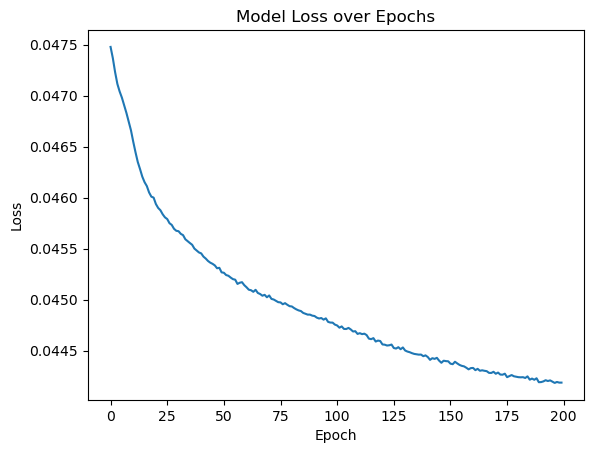

In [43]:
from keras.layers import Dropout
from keras.regularizers import l2

# Crear la arquitectura de la red neuronal
model = Sequential()

# Capa de entrada para características tabulares
model.add(Dense(12, input_dim=X_tabular_train.shape[1], activation='relu'))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Entrenar el modelo y registrar la pérdida en cada epoch
history = model.fit(X_tabular_train, y_train_encoded, batch_size=4195, epochs=200, validation_split=0.1,verbose=1)

# Graficar la pérdida en cada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([ X_tabular_test], y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0442 - mae: 0.0884
Loss: 0.04416734725236893, Accuracy: 0.08840511739253998


In [45]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([X_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

578/578 [==============================] - 1s 2ms/step - loss: 0.0481 - mae: 0.0945
Loss: 0.04811326786875725, Accuracy: 0.09446790814399719


In [46]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_tabular_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_encoded, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

2851/2851 [==============================] - 6s 2ms/step
Proporción de coincidencias de los índices más altos: 0.16723313744408386


In [47]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

578/578 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.025251432897155833


Aunque con los datos en distribución equitativa tiene un accuracy de 0.14 este baja significativamente cuando se pone a prueba con los datos originales es decir los reales

# Primer red neuronal (datos de un pixel 6 bandas distribución original)

Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0423 - mae: 0.0849 - val_loss: 0.0404 - val_mae: 0.0809
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.0805 - val_loss: 0.0403 - val_mae: 0.0810
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0402 - mae: 0.0803 - val_loss: 0.0402 - val_mae: 0.0802
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0402 - mae: 0.0803 - val_loss: 0.0402 - val_mae: 0.0806
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0402 - mae: 0.0803 - val_loss: 0.0402 - val_mae: 0.0796
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0402 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0801
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0803 - val_loss: 0.0402 - val_mae: 0.0810
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0402 - m

64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0801
Epoch 64/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0808
Epoch 65/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0801
Epoch 66/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 67/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 68/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0797
Epoch 69/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0804
Epoch 70/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0

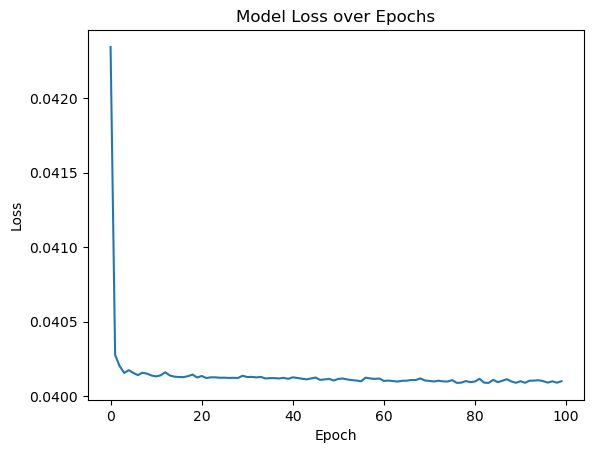

In [48]:
from keras.layers import Dropout
from keras.regularizers import l2

# Crear la arquitectura de la red neuronal
model = Sequential()

# Capa de entrada para características tabulares
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(y.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Entrenar el modelo y registrar la pérdida en cada epoch
history = model.fit(X, y, batch_size=616, epochs=100, validation_split=0.1,verbose=1)

# Graficar la pérdida en cada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [49]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([ X_tabular_test], y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0545 - mae: 0.0950
Loss: 0.054531391710042953, Accuracy: 0.09495522081851959


In [50]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([X_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

578/578 [==============================] - 1s 2ms/step - loss: 0.0403 - mae: 0.0807
Loss: 0.04029081389307976, Accuracy: 0.08068069815635681


In [51]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_tabular_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_encoded, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

2851/2851 [==============================] - 5s 2ms/step
Proporción de coincidencias de los índices más altos: 0.04903078677309008


In [52]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

578/578 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.36460473667135285


Entrenamiento a una sola clase (la mayoritaria)

# Segunda red neuronal (datos de 9 pixeles 6 bandas distribución equitativa)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.0474 - mae: 0.0949 - val_loss: 0.0472 - val_mae: 0.0945
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0469 - mae: 0.0940 - val_loss: 0.0465 - val_mae: 0.0934
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0465 - mae: 0.0932 - val_loss: 0.0466 - val_mae: 0.0933
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0460 - mae: 0.0923 - val_loss: 0.0459 - val_mae: 0.0921
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0456 - mae: 0.0916 - val_loss: 0.0455 - val_mae: 0.0913
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0454 - mae: 0.0911 - val_loss: 0.0453 - val_mae: 0.0910
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0451 - mae: 0.0905 - val_loss: 0.0451 - val_mae: 0.0906
Epoch 8/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0450 -

79/79 [==============================] - 1s 8ms/step - loss: 0.0412 - mae: 0.0831 - val_loss: 0.0413 - val_mae: 0.0829
Epoch 64/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0412 - mae: 0.0830 - val_loss: 0.0412 - val_mae: 0.0828
Epoch 65/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0411 - mae: 0.0829 - val_loss: 0.0413 - val_mae: 0.0823
Epoch 66/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0410 - mae: 0.0828 - val_loss: 0.0410 - val_mae: 0.0826
Epoch 67/200
79/79 [==============================] - 1s 11ms/step - loss: 0.0410 - mae: 0.0826 - val_loss: 0.0410 - val_mae: 0.0828
Epoch 68/200
79/79 [==============================] - 1s 11ms/step - loss: 0.0410 - mae: 0.0826 - val_loss: 0.0410 - val_mae: 0.0827
Epoch 69/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0409 - mae: 0.0825 - val_loss: 0.0411 - val_mae: 0.0825
Epoch 70/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0409 - ma

Epoch 125/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0400 - mae: 0.0805 - val_loss: 0.0401 - val_mae: 0.0807
Epoch 126/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0401 - mae: 0.0806 - val_loss: 0.0401 - val_mae: 0.0808
Epoch 127/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0402 - mae: 0.0807 - val_loss: 0.0403 - val_mae: 0.0814
Epoch 128/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0400 - mae: 0.0805 - val_loss: 0.0400 - val_mae: 0.0803
Epoch 129/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0400 - mae: 0.0804 - val_loss: 0.0400 - val_mae: 0.0805
Epoch 130/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0400 - mae: 0.0804 - val_loss: 0.0400 - val_mae: 0.0807
Epoch 131/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0400 - mae: 0.0804 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 132/200
79/79 [==============================] - 1s 8ms/step -

79/79 [==============================] - 1s 9ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0396 - val_mae: 0.0792
Epoch 187/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0395 - mae: 0.0794 - val_loss: 0.0399 - val_mae: 0.0797
Epoch 188/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0398 - mae: 0.0797 - val_loss: 0.0398 - val_mae: 0.0792
Epoch 189/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0396 - mae: 0.0794 - val_loss: 0.0397 - val_mae: 0.0792
Epoch 190/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0798
Epoch 191/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0399 - mae: 0.0798 - val_loss: 0.0396 - val_mae: 0.0791
Epoch 192/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0395 - mae: 0.0793 - val_loss: 0.0396 - val_mae: 0.0793
Epoch 193/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0395

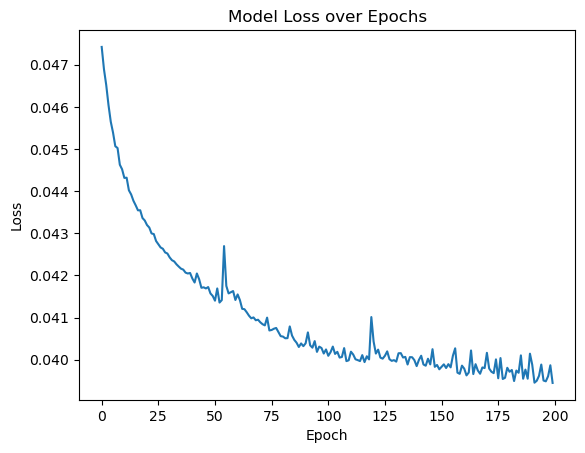

In [53]:
from keras.layers import Dropout
from keras.regularizers import l2

# Crear la arquitectura de la red neuronal
model = Sequential()

# Capa de entrada para características tabulares
model.add(Dense(108, input_dim=X_tabular_train_2.shape[1], activation='relu'))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(y_train_encoded_2.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Entrenar el modelo y registrar la pérdida en cada epoch
history = model.fit(X_tabular_train_2, y_train_encoded_2, batch_size=4195, epochs=200, validation_split=0.1,verbose=1)

# Graficar la pérdida en cada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [54]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([ X_tabular_test_2], y_test_encoded_2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0397 - mae: 0.0789
Loss: 0.03974498063325882, Accuracy: 0.07891639322042465


In [55]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([X_test_2], y_test_2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

578/578 [==============================] - 1s 2ms/step - loss: 0.0480 - mae: 0.0931
Loss: 0.04799049347639084, Accuracy: 0.09310248494148254


In [56]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_tabular_test_2)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_encoded_2, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

2851/2851 [==============================] - 5s 2ms/step
Proporción de coincidencias de los índices más altos: 0.2633760196473994


In [57]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test_2)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_2, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

578/578 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.05271980101654591


Nuevamente vemos un entrenamiento decente para los datos bien distribuidos pero malo para los datos orginales. El modelo no sirve

# Segunda red neuronal (datos de tres pixeles 6 bandas distribución original)

Epoch 1/200
10/10 [==============================] - 1s 34ms/step - loss: 0.0422 - mae: 0.0836 - val_loss: 0.0406 - val_mae: 0.0793
Epoch 2/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0405 - mae: 0.0806 - val_loss: 0.0404 - val_mae: 0.0806
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0404 - mae: 0.0804 - val_loss: 0.0404 - val_mae: 0.0798
Epoch 4/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0403 - mae: 0.0803 - val_loss: 0.0404 - val_mae: 0.0802
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0403 - mae: 0.0804 - val_loss: 0.0403 - val_mae: 0.0801
Epoch 6/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0403 - mae: 0.0804 - val_loss: 0.0404 - val_mae: 0.0788
Epoch 7/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0403 - mae: 0.0802 - val_loss: 0.0403 - val_mae: 0.0812
Epoch 8/200
10/10 [==============================] - 0s 15ms/step - loss: 0.

10/10 [==============================] - 0s 13ms/step - loss: 0.0401 - mae: 0.0803 - val_loss: 0.0401 - val_mae: 0.0794
Epoch 63/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0806
Epoch 64/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 65/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0800
Epoch 66/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0806
Epoch 67/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0805
Epoch 68/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0810
Epoch 69/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0401 

10/10 [==============================] - 0s 14ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0803
Epoch 124/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0400 - mae: 0.0800 - val_loss: 0.0401 - val_mae: 0.0803
Epoch 125/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0400 - mae: 0.0800 - val_loss: 0.0401 - val_mae: 0.0812
Epoch 126/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0401 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0796
Epoch 127/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0401 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0803
Epoch 128/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0400 - mae: 0.0800 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 129/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0400 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0809
Epoch 130/200
10/10 [==============================] - 0s 13ms/step - loss: 

10/10 [==============================] - 0s 17ms/step - loss: 0.0400 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0791
Epoch 185/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0400 - mae: 0.0798 - val_loss: 0.0401 - val_mae: 0.0814
Epoch 186/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0400 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.0802
Epoch 187/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0400 - mae: 0.0800 - val_loss: 0.0401 - val_mae: 0.0811
Epoch 188/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0400 - mae: 0.0799 - val_loss: 0.0401 - val_mae: 0.0807
Epoch 189/200
10/10 [==============================] - 0s 13ms/step - loss: 0.0400 - mae: 0.0802 - val_loss: 0.0401 - val_mae: 0.0795
Epoch 190/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0400 - mae: 0.0800 - val_loss: 0.0401 - val_mae: 0.0806
Epoch 191/200
10/10 [==============================] - 0s 13ms/step - loss: 

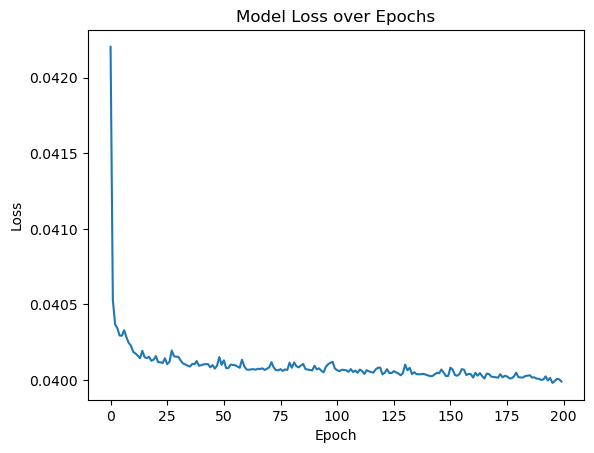

In [58]:
from keras.layers import Dropout
from keras.regularizers import l2

# Crear la arquitectura de la red neuronal
model = Sequential()

# Capa de entrada para características tabulares
model.add(Dense(108, input_dim=X_2.shape[1], activation='relu'))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(y_2.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Entrenar el modelo y registrar la pérdida en cada epoch
history = model.fit(X_2, y_2, batch_size=4195, epochs=200, validation_split=0.1,verbose=1)

# Graficar la pérdida en cada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [59]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([X_test_2], y_test_2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

578/578 [==============================] - 1s 2ms/step - loss: 0.0403 - mae: 0.0799
Loss: 0.04031916707754135, Accuracy: 0.07988554239273071


In [60]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([ X_tabular_test_2], y_test_encoded_2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0552 - mae: 0.0949
Loss: 0.055225152522325516, Accuracy: 0.09488726407289505


In [61]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_tabular_test_2)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_encoded_2, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

2851/2851 [==============================] - 5s 2ms/step
Proporción de coincidencias de los índices más altos: 0.04915139022892729


In [62]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test_2)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_2, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

578/578 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.36433437871742186


Nuevamente el modelo está siendo sobrentrenado a una sola clase

# Tercer red neuronal (Basado en imagenes distribuidos equitativamente)

Epoch 1/50
90/90 - 9s - loss: 433.6901 - accuracy: 0.0503 - val_loss: 87.4574 - val_accuracy: 0.0556 - 9s/epoch - 98ms/step
Epoch 2/50
90/90 - 6s - loss: 39.2612 - accuracy: 0.0602 - val_loss: 13.6754 - val_accuracy: 0.0726 - 6s/epoch - 67ms/step
Epoch 3/50
90/90 - 6s - loss: 9.2413 - accuracy: 0.0737 - val_loss: 5.9039 - val_accuracy: 0.0795 - 6s/epoch - 66ms/step
Epoch 4/50
90/90 - 6s - loss: 6.8953 - accuracy: 0.0793 - val_loss: 7.5057 - val_accuracy: 0.0726 - 6s/epoch - 63ms/step
Epoch 5/50
90/90 - 6s - loss: 4.2839 - accuracy: 0.0882 - val_loss: 3.4517 - val_accuracy: 0.0838 - 6s/epoch - 71ms/step
Epoch 6/50
90/90 - 6s - loss: 7.6942 - accuracy: 0.0736 - val_loss: 4.1992 - val_accuracy: 0.0874 - 6s/epoch - 66ms/step
Epoch 7/50
90/90 - 6s - loss: 3.4008 - accuracy: 0.0944 - val_loss: 3.1264 - val_accuracy: 0.0893 - 6s/epoch - 68ms/step
Epoch 8/50
90/90 - 6s - loss: 5.0320 - accuracy: 0.0843 - val_loss: 5.4944 - val_accuracy: 0.0701 - 6s/epoch - 67ms/step
Epoch 9/50
90/90 - 6s - los

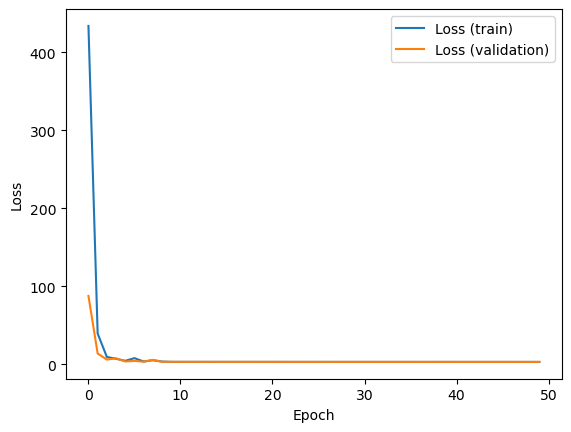

In [63]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(6, 3, 3)),
    keras.layers.MaxPooling2D((2, 2), padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir los parámetros de entrenamiento
batch_size = 19924
epochs = 50
validation_split = 0.1

# Entrenar el modelo e imprimir la información de entrenamiento
history = model.fit(x_imagen_entrenamiento, y_imagen_entrenamiento, batch_size=batch_size, epochs=epochs,
                    validation_split=validation_split, verbose=2)

# Imprimir gráfica de pérdida
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([x_imagen_prueba], y_imagen_prueba)
print(f'Loss: {loss}, Accuracy: {accuracy}')

15566/15566 [==============================] - 36s 2ms/step - loss: 2.8605 - accuracy: 0.1109
Loss: 2.8604841232299805, Accuracy: 0.1109134703874588


In [65]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([x_imagen_prueba_o], y_imagen_prueba_o)
print(f'Loss: {loss}, Accuracy: {accuracy}')

386/386 [==============================] - 1s 3ms/step - loss: 3.0463 - accuracy: 0.0278
Loss: 3.0462698936462402, Accuracy: 0.027818329632282257


In [66]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(x_imagen_prueba)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_imagen_prueba, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

15566/15566 [==============================] - 32s 2ms/step
Proporción de coincidencias de los índices más altos: 0.11091347119052399


In [67]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(x_imagen_prueba_o)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_imagen_prueba_o, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

386/386 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.02781832927818329


El modelo funciona con los datos bien distribuidos pero no para los datos originales. No sirve el modelo.

# Tercer red neuronal (Basado en imagenes distribuidos originalmente)

Epoch 1/50
91/91 - 2s - loss: 680.6753 - accuracy: 0.1864 - val_loss: 150.5933 - val_accuracy: 0.2981 - 2s/epoch - 23ms/step
Epoch 2/50
91/91 - 1s - loss: 113.8311 - accuracy: 0.2019 - val_loss: 99.8674 - val_accuracy: 0.1342 - 563ms/epoch - 6ms/step
Epoch 3/50
91/91 - 0s - loss: 87.1007 - accuracy: 0.2002 - val_loss: 80.5513 - val_accuracy: 0.2930 - 489ms/epoch - 5ms/step
Epoch 4/50
91/91 - 1s - loss: 76.7179 - accuracy: 0.2040 - val_loss: 86.1385 - val_accuracy: 0.3500 - 518ms/epoch - 6ms/step
Epoch 5/50
91/91 - 1s - loss: 63.3434 - accuracy: 0.2021 - val_loss: 62.4912 - val_accuracy: 0.2522 - 519ms/epoch - 6ms/step
Epoch 6/50
91/91 - 1s - loss: 49.4372 - accuracy: 0.2057 - val_loss: 48.5784 - val_accuracy: 0.1338 - 530ms/epoch - 6ms/step
Epoch 7/50
91/91 - 1s - loss: 45.5660 - accuracy: 0.2035 - val_loss: 58.7637 - val_accuracy: 0.3465 - 505ms/epoch - 6ms/step
Epoch 8/50
91/91 - 1s - loss: 41.2630 - accuracy: 0.2042 - val_loss: 36.5083 - val_accuracy: 0.1829 - 537ms/epoch - 6ms/step

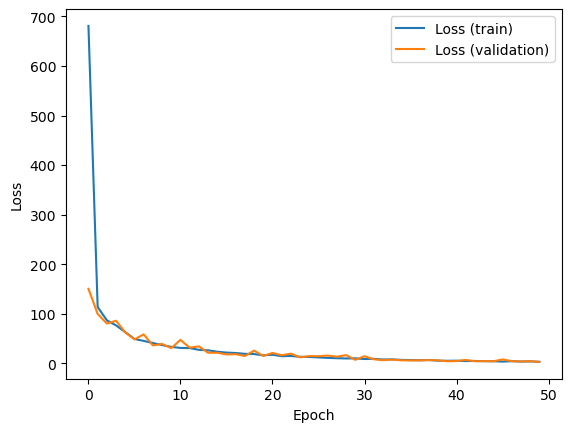

In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(6, 3, 3)),
    keras.layers.MaxPooling2D((2, 2), padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir los parámetros de entrenamiento
batch_size = 493
epochs = 50
validation_split = 0.1

# Entrenar el modelo e imprimir la información de entrenamiento
history = model.fit(x_imagen_entrenamiento_o, y_imagen_entrenamiento_o, batch_size=batch_size, epochs=epochs,
                    validation_split=validation_split, verbose=2)

# Imprimir gráfica de pérdida
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([x_imagen_prueba_o], y_imagen_prueba_o)
print(f'Loss: {loss}, Accuracy: {accuracy}')

386/386 [==============================] - 1s 2ms/step - loss: 3.1765 - accuracy: 0.2200
Loss: 3.176492691040039, Accuracy: 0.219951331615448


In [70]:
# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate([x_imagen_prueba], y_imagen_prueba)
print(f'Loss: {loss}, Accuracy: {accuracy}')

15566/15566 [==============================] - 38s 2ms/step - loss: 20.6998 - accuracy: 0.0546
Loss: 20.69975471496582, Accuracy: 0.05455932393670082


In [71]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(x_imagen_prueba)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_imagen_prueba, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

15566/15566 [==============================] - 34s 2ms/step
Proporción de coincidencias de los índices más altos: 0.054559325436659305


In [72]:
# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(x_imagen_prueba_o)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_imagen_prueba_o, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)

386/386 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.21995133819951337


# Modelo basado en cercanias

In [73]:
gdf_equilibrado

,codigo_act,latitud,longitud,geometry
2471688,51.0,21.861965,-102.302657,POINT (2468872.636 1089178.535)
2498133,51.0,21.896003,-102.262543,POINT (2473005.069 1092958.325)
2687212,51.0,21.862926,-102.303631,POINT (2468772.620 1089285.639)
244891,11.0,21.896882,-102.318231,POINT (2467279.412 1093067.689)
5103599,71.0,22.224665,-102.167724,POINT (2482796.952 1129522.504)
...,...,...,...,...
1154542,23.0,21.901388,-102.275836,POINT (2471639.472 1093560.148)
4587403,61.0,21.866301,-102.204862,POINT (2478931.163 1089643.409)
5558048,81.0,21.881569,-102.242119,POINT (2475102.416 1091348.393)
999478,23.0,21.889677,-102.243797,POINT (2474931.357 1092250.969)


In [74]:
gdf

,codigo_act,latitud,longitud,geometry,valor_pixel_banda_1,valor_pixel_banda_2,valor_pixel_banda_3,valor_pixel_banda_4,valor_pixel_banda_5,valor_pixel_banda_6
0,11.0,21.906992,-102.309807,POINT (2468147.992 1094190.873),0.296134,0.331198,0.434910,0.606379,0.754478,0.495680
1,11.0,21.889926,-102.314009,POINT (2467711.796 1092292.619),0.216160,0.234058,0.306547,0.436823,0.597218,0.413312
2,11.0,22.167778,-102.345556,POINT (2464542.021 1123223.156),0.255981,0.320992,0.427433,0.535602,0.644701,0.490458
3,11.0,21.956298,-101.997312,POINT (2500276.264 1099643.835),0.712311,0.701654,0.733701,0.673049,0.578405,0.370775
4,11.0,21.837255,-102.710931,POINT (2426869.540 1086576.086),0.297127,0.351982,0.450213,0.542642,0.666867,0.530668
...,...,...,...,...,...,...,...,...,...,...
61641,93.0,21.875367,-102.279581,POINT (2471248.754 1090665.178),0.195629,0.208805,0.253581,0.354579,0.440859,0.313188
61642,93.0,21.865938,-102.289821,POINT (2470193.605 1089617.948),0.214587,0.230781,0.303752,0.424236,0.590713,0.401016
61643,93.0,21.919051,-101.959755,POINT (2504137.271 1095499.347),0.312029,0.351833,0.463979,0.566697,0.737967,0.604823
61644,93.0,21.893411,-102.323357,POINT (2466751.468 1092682.561),0.279659,0.315182,0.405143,0.517468,0.689232,0.502469


In [75]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import NearestNeighbors

In [76]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Extrae las coordenadas de 'geometry' y conviértelas en un array numpy de forma vectorizada
coordinates = np.array([[geom.x, geom.y] for geom in gdf['geometry']])

# Crea un objeto NearestNeighbors para buscar los vecinos cercanos
k_neighbors = 5  # Número de vecinos cercanos que deseas considerar
neighbors = NearestNeighbors(n_neighbors=k_neighbors, algorithm='ball_tree', metric='haversine')
neighbors.fit(coordinates)

# Encuentra los vecinos cercanos para todas las filas en un solo paso
distances, indices = neighbors.kneighbors(coordinates)

# Preparar un DataFrame para los códigos de los vecinos
neighbor_codes_df = pd.DataFrame(index=gdf.index, columns=[f'surrounding_code_{i+1}' for i in range(k_neighbors)])

# Asignar los códigos de los vecinos a las nuevas columnas
for i in range(k_neighbors):
    neighbor_codes_df.iloc[:, i] = gdf.iloc[indices[:, i]]['codigo_act'].values

# Concatena las columnas nuevas al GeoDataFrame original
gdf = pd.concat([gdf, neighbor_codes_df], axis=1)


C:\Users\ANDRES.PEREZ\AppData\Local\Temp\ipykernel_12052\2534373260.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  neighbor_codes_df.iloc[:, i] = gdf.iloc[indices[:, i]]['codigo_act'].values


In [77]:
gdf

,codigo_act,latitud,longitud,geometry,valor_pixel_banda_1,valor_pixel_banda_2,valor_pixel_banda_3,valor_pixel_banda_4,valor_pixel_banda_5,valor_pixel_banda_6,surrounding_code_1,surrounding_code_2,surrounding_code_3,surrounding_code_4,surrounding_code_5
0,11.0,21.906992,-102.309807,POINT (2468147.992 1094190.873),0.296134,0.331198,0.434910,0.606379,0.754478,0.495680,11.0,62.0,81.0,46.0,43.0
1,11.0,21.889926,-102.314009,POINT (2467711.796 1092292.619),0.216160,0.234058,0.306547,0.436823,0.597218,0.413312,11.0,72.0,46.0,72.0,62.0
2,11.0,22.167778,-102.345556,POINT (2464542.021 1123223.156),0.255981,0.320992,0.427433,0.535602,0.644701,0.490458,11.0,31.0,72.0,72.0,48.0
3,11.0,21.956298,-101.997312,POINT (2500276.264 1099643.835),0.712311,0.701654,0.733701,0.673049,0.578405,0.370775,11.0,81.0,62.0,81.0,46.0
4,11.0,21.837255,-102.710931,POINT (2426869.540 1086576.086),0.297127,0.351982,0.450213,0.542642,0.666867,0.530668,11.0,52.0,72.0,72.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61641,93.0,21.875367,-102.279581,POINT (2471248.754 1090665.178),0.195629,0.208805,0.253581,0.354579,0.440859,0.313188,93.0,43.0,62.0,81.0,46.0
61642,93.0,21.865938,-102.289821,POINT (2470193.605 1089617.948),0.214587,0.230781,0.303752,0.424236,0.590713,0.401016,93.0,31.0,46.0,72.0,46.0
61643,93.0,21.919051,-101.959755,POINT (2504137.271 1095499.347),0.312029,0.351833,0.463979,0.566697,0.737967,0.604823,93.0,72.0,46.0,46.0,46.0
61644,93.0,21.893411,-102.323357,POINT (2466751.468 1092682.561),0.279659,0.315182,0.405143,0.517468,0.689232,0.502469,93.0,62.0,46.0,53.0,43.0


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [175]:
# Convert y to a pandas Series
y = gdf['codigo_act'].astype('category')

# Create a dictionary to map category codes to their respective category labels
y_dict = dict(enumerate(y.cat.categories))

# Apply pd.get_dummies to create dummy variables for y
y = pd.get_dummies(y, columns=['codigo_act'])

# Convert y to a numpy array
y = y.values

surronding = ['surrounding_code_1','surrounding_code_2', 'surrounding_code_3', 'surrounding_code_4', 'surrounding_code_5']

# Create an empty DataFrame for X
X = pd.DataFrame()

# Create an empty dictionary to store category mappings for each column
X_dict = {}

for i in surronding:
    # Create a new column in X for each column of 'surrounding'
    X[i] = gdf[i].astype('category')
    
    # Create a dictionary for the category mappings of the current column
    X_dict[i] = dict(enumerate(X[i].cat.categories))

# Apply pd.get_dummies to all columns of X
X = pd.get_dummies(X, columns=surronding)

# Apply SMOTE to the training data for tabular features
smote_tabular = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smote_tabular.fit_resample(X, y)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [133]:
print(X_train.shape, X_smote_train.shape)

(49316, 100) (364832, 100)


In [134]:
# Crear un modelo de red neuronal para clasificación binaria
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='sigmoid')  # Una unidad en la capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [135]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=493, validation_data=(X_test, y_test))

Epoch 1/100
101/101 [==============================] - 2s 8ms/step - loss: 0.1212 - mae: 0.3056 - val_loss: 0.0395 - val_mae: 0.1284
Epoch 2/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0330 - mae: 0.1031 - val_loss: 0.0250 - val_mae: 0.0822
Epoch 3/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0222 - mae: 0.0747 - val_loss: 0.0169 - val_mae: 0.0607
Epoch 4/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0165 - mae: 0.0583 - val_loss: 0.0132 - val_mae: 0.0481
Epoch 5/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0135 - mae: 0.0488 - val_loss: 0.0109 - val_mae: 0.0408
Epoch 6/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0114 - mae: 0.0428 - val_loss: 0.0091 - val_mae: 0.0356
Epoch 7/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0097 - mae: 0.0381 - val_loss: 0.0076 - val_mae: 0.0311
Epoch 8/100
101/101 [==============================] - 1s 6ms/step - 

101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0098 - val_loss: 0.0049 - val_mae: 0.0084
Epoch 63/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0098 - val_loss: 0.0049 - val_mae: 0.0084
Epoch 64/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0098 - val_loss: 0.0049 - val_mae: 0.0083
Epoch 65/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0097 - val_loss: 0.0048 - val_mae: 0.0084
Epoch 66/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0096 - val_loss: 0.0048 - val_mae: 0.0083
Epoch 67/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0096 - val_loss: 0.0048 - val_mae: 0.0082
Epoch 68/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - mae: 0.0096 - val_loss: 0.0048 - val_mae: 0.0082
Epoch 69/100
101/101 [==============================] - 1s 5ms/step - loss:

In [136]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

386/386 [==============================] - 1s 2ms/step - loss: 0.0048 - mae: 0.0079
Pérdida en el conjunto de prueba: 0.00477768387645483
Precisión en el conjunto de prueba: 0.007863565348088741


In [138]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_smote_test, y_smote_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0373 - mae: 0.0388
Pérdida en el conjunto de prueba: 0.03733023628592491
Precisión en el conjunto de prueba: 0.038763608783483505


In [139]:
# Convierte el DataFrame de pandas en una matriz NumPy
y_test_array = y_test

# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_array, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)


386/386 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.9439578264395783


In [140]:
# Convierte el DataFrame de pandas en una matriz NumPy
y_test_array = y_smote_test

# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_smote_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_array, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)


2851/2851 [==============================] - 5s 2ms/step
Proporción de coincidencias de los índices más altos: 0.4038571177966845


In [141]:
# Crear un modelo de red neuronal para clasificación binaria
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_smote_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='sigmoid')  # Una unidad en la capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [142]:
# Entrenar el modelo
model.fit(X_smote_train, y_smote_train, epochs=100, batch_size=3648, validation_data=(X_smote_test, y_smote_test))

Epoch 1/100
101/101 [==============================] - 2s 13ms/step - loss: 0.1593 - mae: 0.2516 - val_loss: 0.0577 - val_mae: 0.1177
Epoch 2/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0528 - mae: 0.0981 - val_loss: 0.0492 - val_mae: 0.0837
Epoch 3/100
101/101 [==============================] - 1s 12ms/step - loss: 0.0487 - mae: 0.0801 - val_loss: 0.0474 - val_mae: 0.0750
Epoch 4/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0469 - mae: 0.0743 - val_loss: 0.0457 - val_mae: 0.0713
Epoch 5/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0455 - mae: 0.0717 - val_loss: 0.0442 - val_mae: 0.0691
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0440 - mae: 0.0697 - val_loss: 0.0426 - val_mae: 0.0670
Epoch 7/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0423 - mae: 0.0675 - val_loss: 0.0408 - val_mae: 0.0645
Epoch 8/100
101/101 [==============================] - 1s 10ms

Epoch 62/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0070 - mae: 0.0105 - val_loss: 0.0068 - val_mae: 0.0091
Epoch 63/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0070 - mae: 0.0104 - val_loss: 0.0068 - val_mae: 0.0091
Epoch 64/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0071 - mae: 0.0106 - val_loss: 0.0067 - val_mae: 0.0090
Epoch 65/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0070 - mae: 0.0104 - val_loss: 0.0067 - val_mae: 0.0089
Epoch 66/100
101/101 [==============================] - 1s 12ms/step - loss: 0.0069 - mae: 0.0102 - val_loss: 0.0066 - val_mae: 0.0089
Epoch 67/100
101/101 [==============================] - 1s 13ms/step - loss: 0.0069 - mae: 0.0102 - val_loss: 0.0066 - val_mae: 0.0088
Epoch 68/100
101/101 [==============================] - 1s 13ms/step - loss: 0.0068 - mae: 0.0100 - val_loss: 0.0066 - val_mae: 0.0088
Epoch 69/100
101/101 [==============================] -

In [143]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

386/386 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0086
Pérdida en el conjunto de prueba: 0.005722821690142155
Precisión en el conjunto de prueba: 0.0085744708776474


In [144]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_smote_test, y_smote_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

2851/2851 [==============================] - 6s 2ms/step - loss: 0.0062 - mae: 0.0077
Pérdida en el conjunto de prueba: 0.006217014975845814
Precisión en el conjunto de prueba: 0.007674601394683123


In [145]:
# Convierte el DataFrame de pandas en una matriz NumPy
y_test_array = y_test

# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_array, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)


386/386 [==============================] - 1s 2ms/step
Proporción de coincidencias de los índices más altos: 0.9321978913219789


In [146]:
# Convierte el DataFrame de pandas en una matriz NumPy
y_test_array = y_smote_test

# Realiza las predicciones en tus datos de prueba
predicciones = model.predict(X_smote_test)

# Encuentra el índice del valor más alto en cada predicción
indice_predicciones = np.argmax(predicciones, axis=1)
indice_y_test = np.argmax(y_test_array, axis=1)

# Calcula la proporción de coincidencias de los índices más altos
proporcion_coincidencias = np.mean(indice_predicciones == indice_y_test)

# Imprime la proporción de coincidencias
print("Proporción de coincidencias de los índices más altos:", proporcion_coincidencias)


2851/2851 [==============================] - 5s 2ms/step
Proporción de coincidencias de los índices más altos: 0.9087031839312341


In [86]:
# Reemplaza 'nombre_del_archivo.geojson' con el nombre que desees para el archivo GeoJSON
archivo_salida = 'geoespacial.geojson'

# Exporta el GeoDataFrame a GeoJSON
gdf.to_file(archivo_salida, driver='GeoJSON')

# Aplicación modelo

In [174]:
y_dict

{0: 11.0,
 1: 21.0,
 2: 22.0,
 3: 23.0,
 4: 31.0,
 5: 43.0,
 6: 46.0,
 7: 48.0,
 8: 51.0,
 9: 52.0,
 10: 53.0,
 11: 54.0,
 12: 55.0,
 13: 56.0,
 14: 61.0,
 15: 62.0,
 16: 71.0,
 17: 72.0,
 18: 81.0,
 19: 93.0}

In [166]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

def latlon_to_gdf(latitud, longitud):
    ruta_tiff = "imagen.tif"

    with rasterio.open(ruta_tiff) as src:
        srs_raster = src.crs.to_proj4()
    # Crea un DataFrame con una sola fila que contiene la latitud y longitud proporcionadas
    data = {'latitud': [latitud], 'longitud': [longitud]}
    df = pd.DataFrame(data)

    # Crea una columna 'geometry' utilizando las columnas de latitud y longitud
    geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
    df['geometry'] = geometry

    # Crea un GeoDataFrame de GeoPandas
    gdf = gpd.GeoDataFrame(df, geometry='geometry')

        
    srs_gdf = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
    transformador = Transformer.from_proj(Proj(srs_gdf), Proj(srs_raster))
    gdf["geometry"] = gdf["geometry"].apply(lambda geom: Point(transformador.transform(geom.x, geom.y)))  
    
    return gdf

# Ejemplo de uso
latitud = 21.906992
longitud = -102.309807
resultado = latlon_to_gdf(latitud, longitud)
print(resultado)

     latitud    longitud                         geometry
0  21.906992 -102.309807  POINT (2468147.992 1094190.873)


In [167]:
# Extraer las coordenadas "x" e "y" en columnas separadas
resultado['x'] = resultado['geometry'].x
resultado['y'] = resultado['geometry'].y

# Mostrar el GeoDataFrame resultante
print(resultado)

     latitud    longitud                         geometry             x  \
0  21.906992 -102.309807  POINT (2468147.992 1094190.873)  2.468148e+06   

              y  
0  1.094191e+06  


In [168]:
[coordenada_x,coordenada_y] = [resultado['x'][0],resultado['y'][0] ]
[coordenada_x,coordenada_y]

[2468147.991976694, 1094190.872836755]

In [169]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_nearest_neighbors(input_coords, gdf, k_neighbors=5):
    # Extrae las coordenadas del gdf
    coordinates = np.array([[geom.x, geom.y] for geom in gdf['geometry']])

    # Crea e inicializa el objeto NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=k_neighbors, algorithm='ball_tree', metric='haversine')
    neighbors.fit(coordinates)

    # Encuentra los vecinos más cercanos para las coordenadas dadas
    distances, indices = neighbors.kneighbors([input_coords])

    # Extrae los códigos de actividad de los vecinos más cercanos
    neighbor_codes = gdf.iloc[indices[0]]['codigo_act'].values

    return neighbor_codes

# Uso de la función (ejemplo)
# input_coords = [x, y]  # Reemplaza x, y con las coordenadas de interés
# nearest_neighbor_codes = find_nearest_neighbors(input_coords, gdf)


# Ejemplo de uso de la función:
# Supongamos que tienes un GeoDataFrame llamado 'mi_gdf' y un arreglo de coordenadas llamado 'mis_coordenadas'
neighbors_values = find_nearest_neighbors([coordenada_x,coordenada_y],gdf)
neighbors_values

array([11., 62., 81., 46., 43.])

In [88]:
count_true = ((gdf["codigo_act"] == gdf["surrounding_code_1"]).sum()/len(gdf))
count_true

0.9250884080070078